In [1]:
# Author: Andres Melendez
# Date: 2024-10-12

import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided CSV file
file_path = '../data/Mod7/fb_stock_prices_2018.csv'

# Attempting to load the data and inspect the columns for any discrepancies.
try:
    # Load the data from the provided CSV file
    fb_data = pd.read_csv(file_path)

    # Display the first few rows to understand the structure and column names
    fb_data.head()

except FileNotFoundError as fnf_error:
    print(f"Error: {fnf_error}")
except pd.errors.ParserError as parse_error:
    print(f"Parsing Error: {parse_error}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
finally:
    print("Execution completed.")


Execution completed.


In [2]:
# Displaying the columns to identify any discrepancies in column names
fb_data.columns


Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

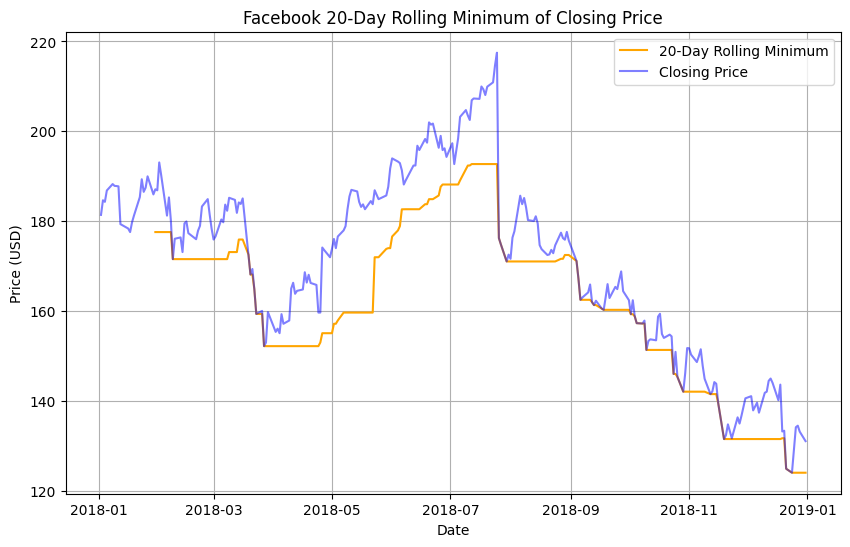

Execution completed.


In [3]:
# Correcting the column names to match the data provided
try:
    fb_data = pd.read_csv(file_path)
    
    # Renaming columns to match the expected format
    fb_data.rename(columns={'date': 'Date', 'close': 'Close'}, inplace=True)

    # Ensure proper date handling
    fb_data['Date'] = pd.to_datetime(fb_data['Date'])
    fb_data.set_index('Date', inplace=True)

    # Calculate the rolling 20-day minimum of the closing price
    fb_data['Rolling_20_Min'] = fb_data['Close'].rolling(window=20).min()

    # Plotting the rolling 20-day minimum of the Facebook closing price
    plt.figure(figsize=(10, 6))
    plt.plot(fb_data.index, fb_data['Rolling_20_Min'], label='20-Day Rolling Minimum', color='orange')
    plt.plot(fb_data.index, fb_data['Close'], label='Closing Price', color='blue', alpha=0.5)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title('Facebook 20-Day Rolling Minimum of Closing Price')
    plt.legend()
    plt.grid(True)
    plt.show()

except FileNotFoundError as fnf_error:
    print(f"Error: {fnf_error}")
except pd.errors.ParserError as parse_error:
    print(f"Parsing Error: {parse_error}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
finally:
    print("Execution completed.")


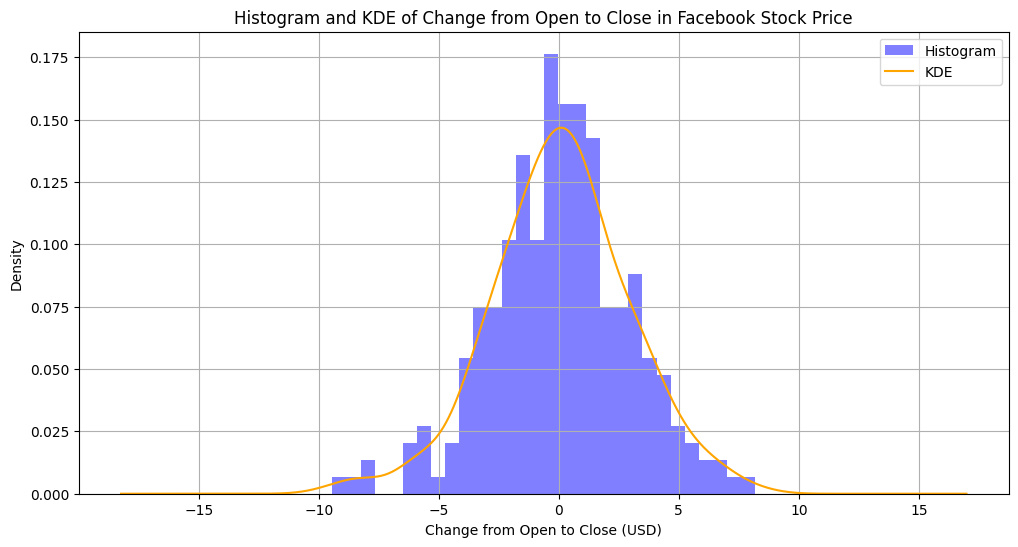

Execution completed.


In [4]:
# Calculate the change from open to close for Facebook stock
try:
    fb_data['Change_Open_Close'] = fb_data['Close'] - fb_data['open']

    # Plotting the histogram and KDE of the change from open to close
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.hist(fb_data['Change_Open_Close'], bins=30, alpha=0.5, label='Histogram', color='blue', density=True)

    # KDE
    fb_data['Change_Open_Close'].plot(kind='kde', label='KDE', color='orange')

    plt.xlabel('Change from Open to Close (USD)')
    plt.ylabel('Density')
    plt.title('Histogram and KDE of Change from Open to Close in Facebook Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

except KeyError as key_error:
    print(f"Key Error: {key_error}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
finally:
    print("Execution completed.")


In [ ]:
# Load the earthquake data from the provided CSV file
try:
    earthquake_data_path = '../data/Mod7/earthquakes.csv'
    earthquake_data = pd.read_csv(earthquake_data_path)

    # Display the first few rows to understand the structure and identify relevant columns
    earthquake_data.head()

except FileNotFoundError as fnf_error:
    print(f"Error: {fnf_error}")
except pd.errors.ParserError as parse_error:
    print(f"Parsing Error: {parse_error}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
finally:
    print("Execution completed.")


Execution completed.


In [6]:
# Displaying the columns to identify any relevant data for the analysis
earthquake_data.columns


Index(['mag', 'magType', 'time', 'place', 'tsunami', 'parsed_place'], dtype='object')

<Figure size 1200x800 with 0 Axes>

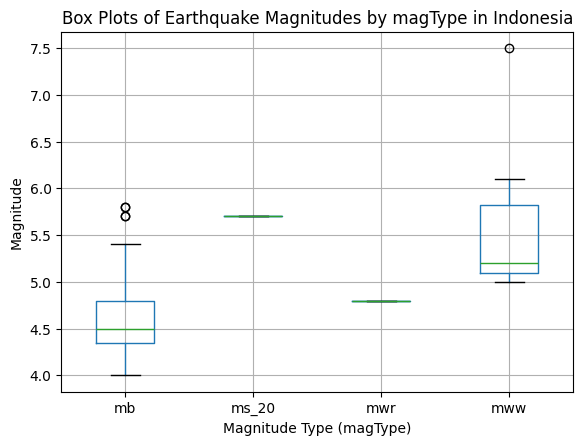

Execution completed.


In [7]:
# Filtering data for Indonesia and creating box plots for magnitudes by magType
try:
    # Filtering earthquakes that occurred in Indonesia
    indonesia_data = earthquake_data[earthquake_data['parsed_place'].str.contains('Indonesia', case=False, na=False)]

    # Creating box plots for each magType
    plt.figure(figsize=(12, 8))
    indonesia_data.boxplot(column='mag', by='magType', grid=True)
    
    plt.xlabel('Magnitude Type (magType)')
    plt.ylabel('Magnitude')
    plt.title('Box Plots of Earthquake Magnitudes by magType in Indonesia')
    plt.suptitle('')  # Removing the default subtitle
    plt.grid(True)
    plt.show()

except KeyError as key_error:
    print(f"Key Error: {key_error}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
finally:
    print("Execution completed.")


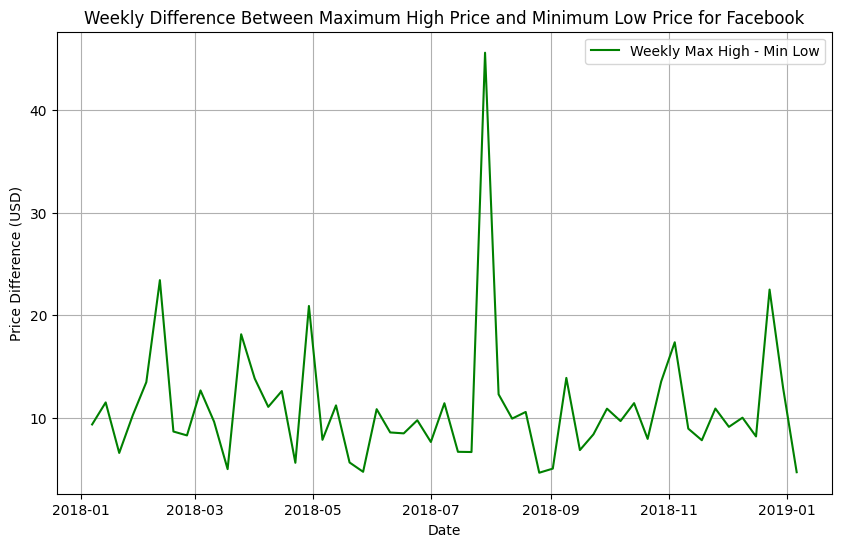

Execution completed.


In [8]:
# Calculating the difference between the weekly maximum high price and the weekly minimum low price for Facebook
try:
    # Resampling the data to weekly frequency and calculating the max of 'high' and min of 'low' for each week
    weekly_data = fb_data.resample('W').agg({'high': 'max', 'low': 'min'})

    # Calculating the difference between the weekly maximum high and minimum low
    weekly_data['High_Low_Diff'] = weekly_data['high'] - weekly_data['low']

    # Plotting the difference
    plt.figure(figsize=(10, 6))
    plt.plot(weekly_data.index, weekly_data['High_Low_Diff'], label='Weekly Max High - Min Low', color='green')
    plt.xlabel('Date')
    plt.ylabel('Price Difference (USD)')
    plt.title('Weekly Difference Between Maximum High Price and Minimum Low Price for Facebook')
    plt.legend()
    plt.grid(True)
    plt.show()

except KeyError as key_error:
    print(f"Key Error: {key_error}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
finally:
    print("Execution completed.")


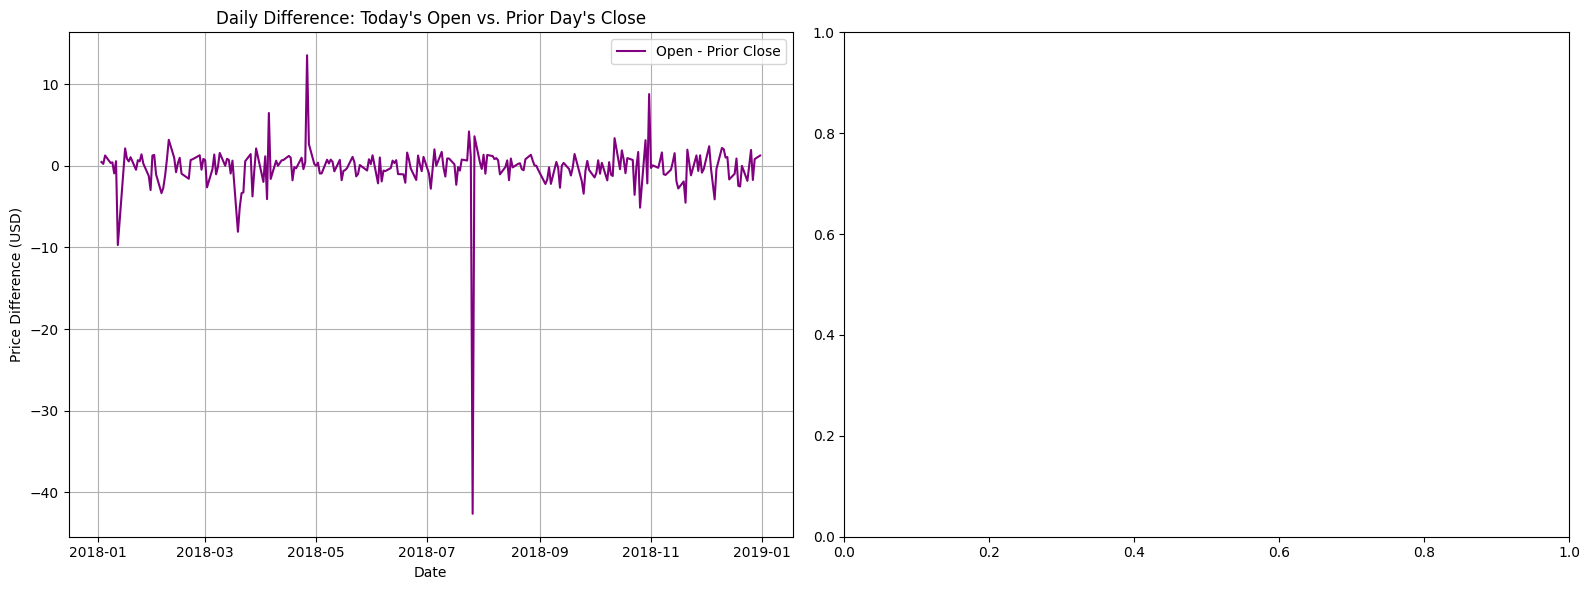

Execution completed.


In [9]:
# Calculating the daily difference between the opening price and the prior day's closing price
try:
    # Calculating the daily difference: today's opening price - prior day's closing price
    fb_data['Prior_Close'] = fb_data['Close'].shift(1)
    fb_data['Open_Close_Diff'] = fb_data['open'] - fb_data['Prior_Close']

    # Plotting the subplots side-by-side
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # First subplot: Line plot of the daily difference between today's opening price and prior day's closing price
    axs[0].plot(fb_data.index, fb_data['Open_Close_Diff'], label='Open - Prior Close', color='purple')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Price Difference (USD)')
    axs[0].set_title("Daily Difference: Today's Open vs. Prior Day's Close")
    axs[0].legend()
    axs[0].grid(True)

    plt.tight_layout()
    plt.show()

except KeyError as key_error:
    print(f"Key Error: {key_error}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
finally:
    print("Execution completed.")


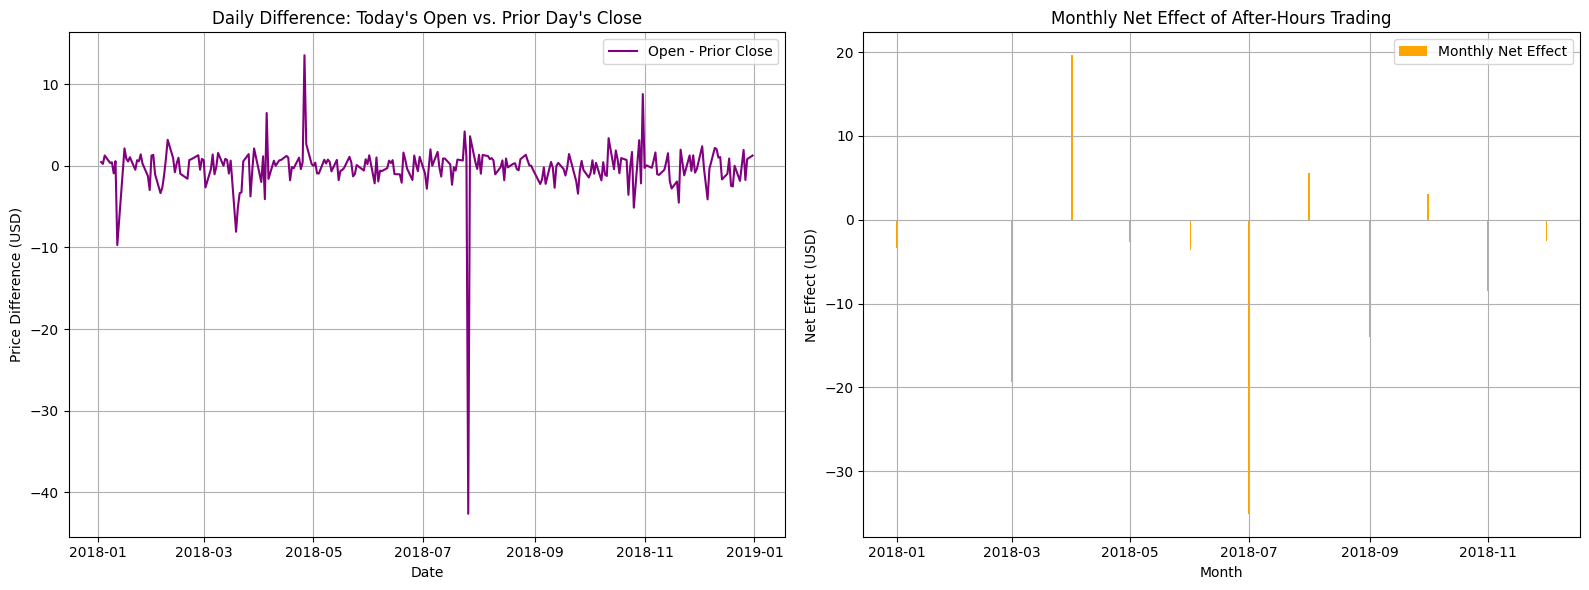

Execution completed.


In [10]:
# Using 'MS' to represent month start for proper aggregation without warning
try:
    # Resampling to monthly frequency using 'MS' for month start and calculating the sum of the daily difference
    monthly_net_effect = fb_data['Open_Close_Diff'].resample('MS').sum()

    # Plotting the subplots side-by-side
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # First subplot: Line plot of the daily difference between today's opening price and prior day's closing price
    axs[0].plot(fb_data.index, fb_data['Open_Close_Diff'], label='Open - Prior Close', color='purple')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Price Difference (USD)')
    axs[0].set_title("Daily Difference: Today's Open vs. Prior Day's Close")
    axs[0].legend()
    axs[0].grid(True)

    # Second subplot: Bar plot showing the net effect of after-hours trading on a monthly basis
    axs[1].bar(monthly_net_effect.index, monthly_net_effect, color='orange', label='Monthly Net Effect')
    axs[1].set_xlabel('Month')
    axs[1].set_ylabel('Net Effect (USD)')
    axs[1].set_title('Monthly Net Effect of After-Hours Trading')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

except KeyError as key_error:
    print(f"Key Error: {key_error}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
finally:
    print("Execution completed.")


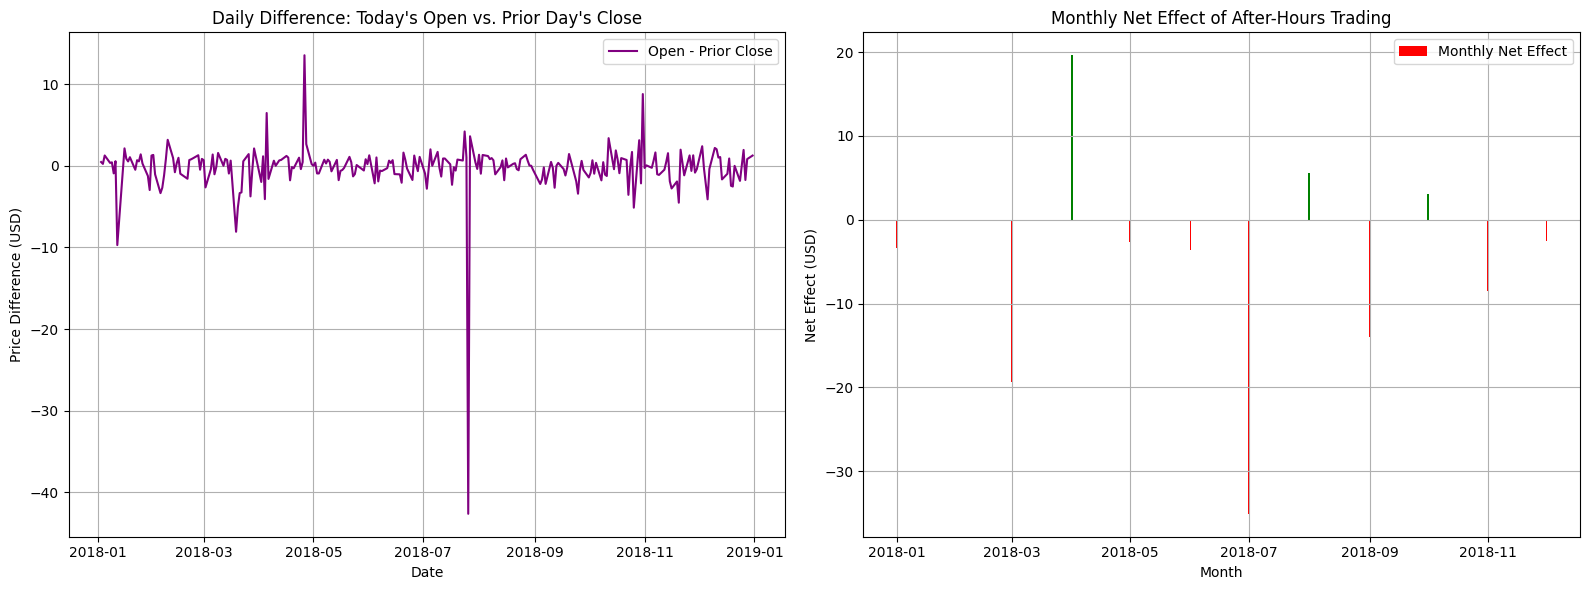

Execution completed.


In [11]:
# Updating the bar plot to color the bars based on gains (green) or drops (red)
try:
    # Assigning colors based on whether there is a gain or drop
    colors = ['green' if value > 0 else 'red' for value in monthly_net_effect]

    # Plotting the subplots side-by-side
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # First subplot: Line plot of the daily difference between today's opening price and prior day's closing price
    axs[0].plot(fb_data.index, fb_data['Open_Close_Diff'], label='Open - Prior Close', color='purple')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Price Difference (USD)')
    axs[0].set_title("Daily Difference: Today's Open vs. Prior Day's Close")
    axs[0].legend()
    axs[0].grid(True)

    # Second subplot: Bar plot showing the net effect of after-hours trading on a monthly basis, with colors for gains/drops
    axs[1].bar(monthly_net_effect.index, monthly_net_effect, color=colors, label='Monthly Net Effect')
    axs[1].set_xlabel('Month')
    axs[1].set_ylabel('Net Effect (USD)')
    axs[1].set_title('Monthly Net Effect of After-Hours Trading')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

except KeyError as key_error:
    print(f"Key Error: {key_error}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
finally:
    print("Execution completed.")


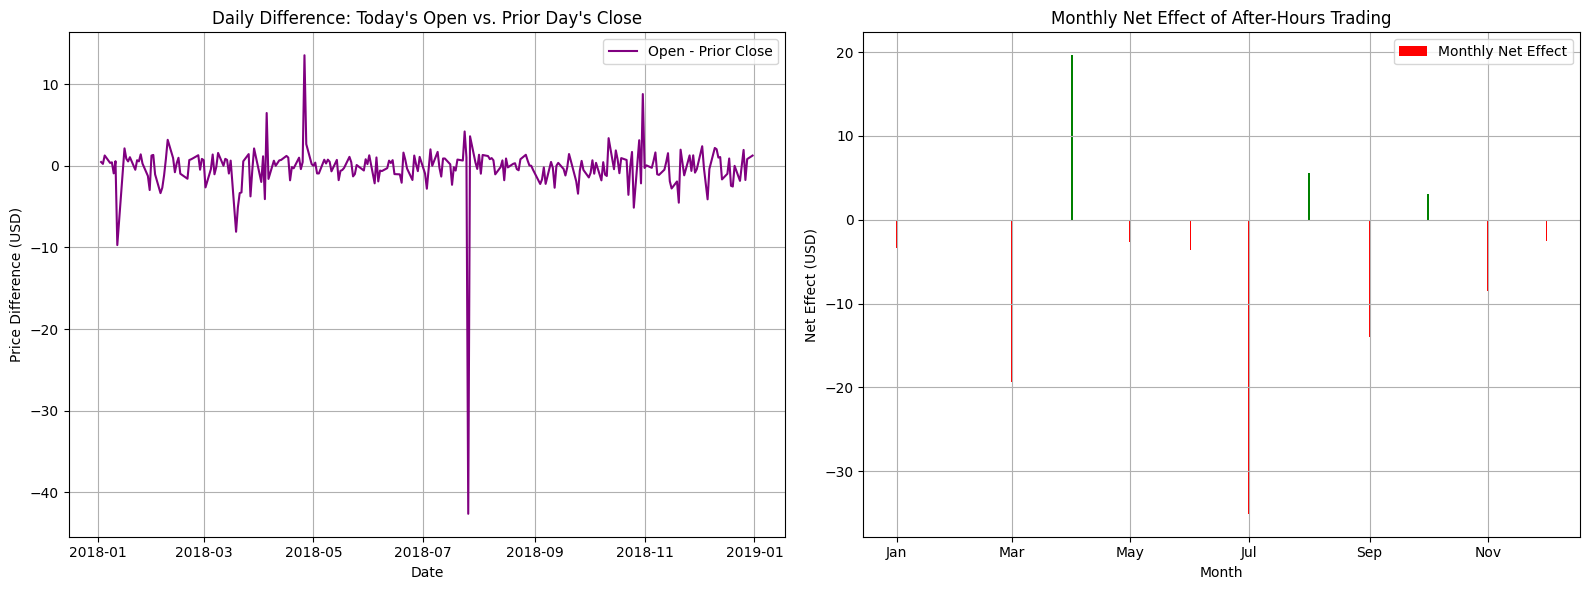

Execution completed.


In [12]:
# Updating the x-axis labels of the bar plot to show the three-letter abbreviation for the month
import matplotlib.dates as mdates

try:
    # Plotting the subplots side-by-side
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # First subplot: Line plot of the daily difference between today's opening price and prior day's closing price
    axs[0].plot(fb_data.index, fb_data['Open_Close_Diff'], label='Open - Prior Close', color='purple')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Price Difference (USD)')
    axs[0].set_title("Daily Difference: Today's Open vs. Prior Day's Close")
    axs[0].legend()
    axs[0].grid(True)

    # Second subplot: Bar plot showing the net effect of after-hours trading on a monthly basis, with colors for gains/drops
    axs[1].bar(monthly_net_effect.index, monthly_net_effect, color=colors, label='Monthly Net Effect')
    axs[1].set_xlabel('Month')
    axs[1].set_ylabel('Net Effect (USD)')
    axs[1].set_title('Monthly Net Effect of After-Hours Trading')
    axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Setting the x-axis to show three-letter month abbreviation
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

except KeyError as key_error:
    print(f"Key Error: {key_error}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
finally:
    print("Execution completed.")
